In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [3]:
image = cv2.imread('./acc1.png')
desired_width = 1024
desired_height = 512

# Resize the image to the desired size
image = cv2.resize(image, (desired_width, desired_height))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

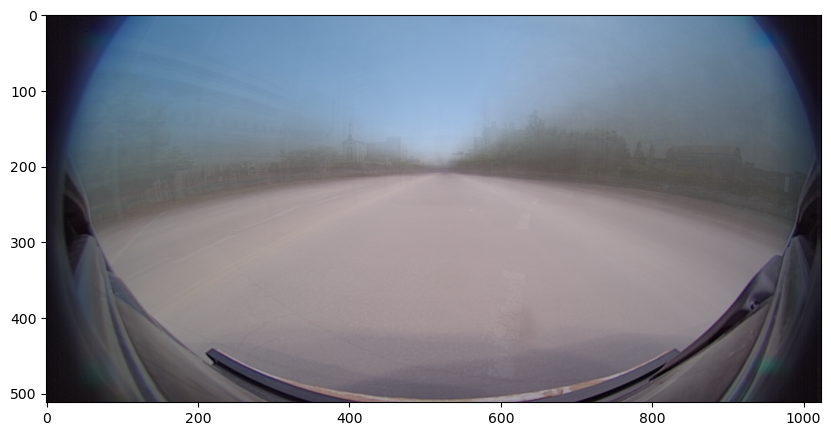

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [5]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [6]:
predictor.set_image(image)

In [7]:
#for 0
# input_point = np.array([[450,300]])
# input_label = np.array([1])

#for 1
input_point = np.array([[450,300], [1158/2,454/2],[1233/2,461/2],[695/2,455/2],
                        [210/2,884/2]])
input_label = np.array([1,1,1,1,0])

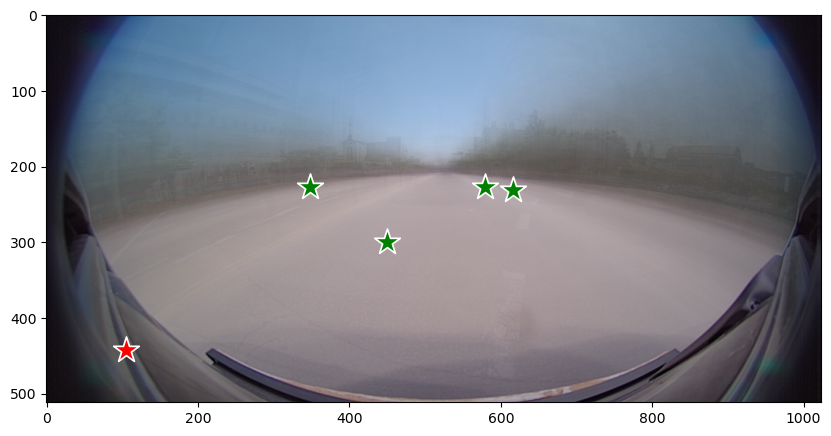

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [9]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

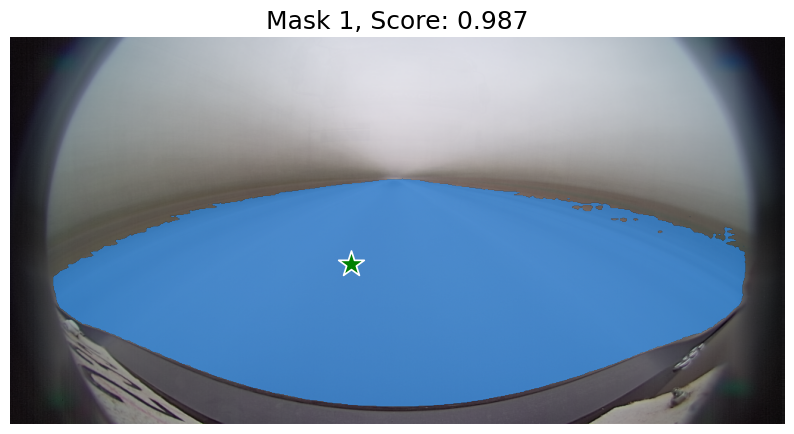

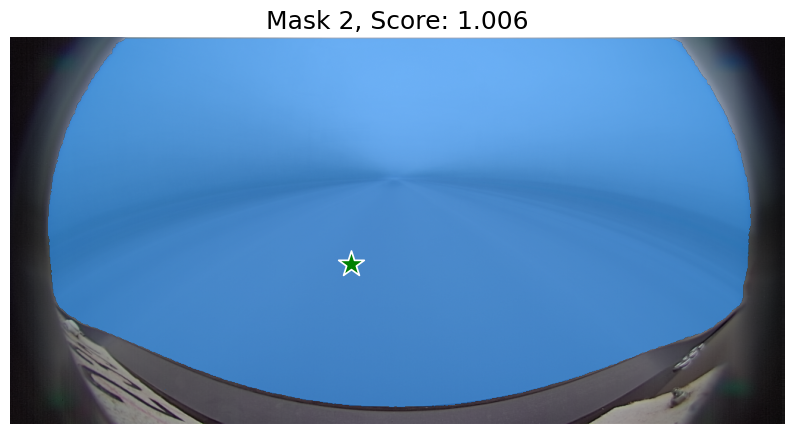

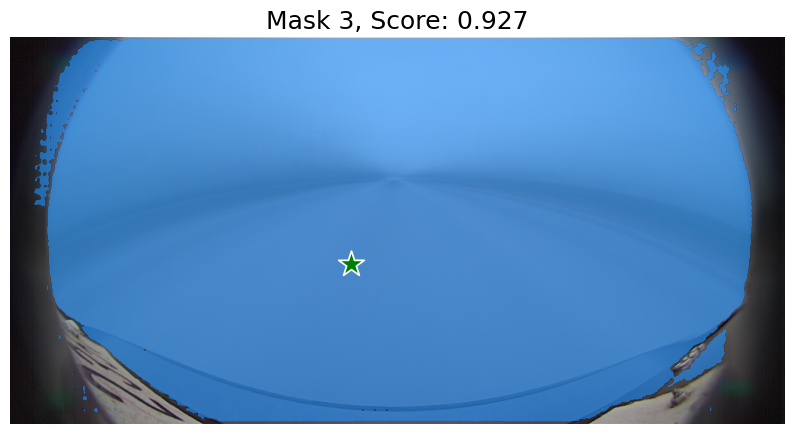

In [18]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [14]:
masks[2]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
np.save('mask1_1024_512.npy', masks[2])

In [19]:
desired_width = 1024
desired_height = 512

In [20]:
road_mask = np.load("./mask1_1024_512.npy")
img = cv2.imread('./acc1.png')
img = cv2.resize(img, (desired_width, desired_height))
img[road_mask] = 0
cv2.imwrite("front.png", img)

True

In [6]:
road_mask.shape

(540, 960)

In [15]:
import numpy as np

# Create a sample binary mask (replace this with your own mask data)
mask = np.array([[False, False, False],
                 [False, True, False],
                 [False, False, False]])

# Create a sample NumPy array (replace this with your own array data)
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Make sure the mask has the same shape as the image
if mask.shape != image.shape:
    raise ValueError("The mask and image must have the same shape.")

# Create a copy of the original image
modified_image = np.copy(image)

# Set the masked regions to 12
modified_image[~mask] = 12

# Print the modified image
print("Modified Image:")
print(modified_image)


Modified Image:
[[12 12 12]
 [12  5 12]
 [12 12 12]]
